In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [31]:
startup = pd.read_csv("50_Startups.csv")

In [32]:
startup.head(40)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [33]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f77598276d8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7759827da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f775986edd8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7759834470>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f77598347b8>],
 'means': []}

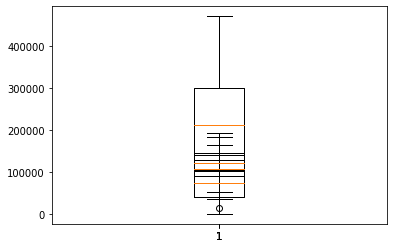

In [34]:
plt.boxplot(startup["Profit"])
plt.boxplot(startup["R&D Spend"])
plt.boxplot(startup["Administration"])
plt.boxplot(startup["Marketing Spend"])

In [35]:
startup.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [40]:
Startup= pd.get_dummies(startup['State'])

In [41]:
startup= pd.concat([startup,Startup],axis=1)
startup= startup.drop(["State"],axis=1)

In [42]:
startup= startup.iloc[:,[3,0,1,2,4,5,6]]

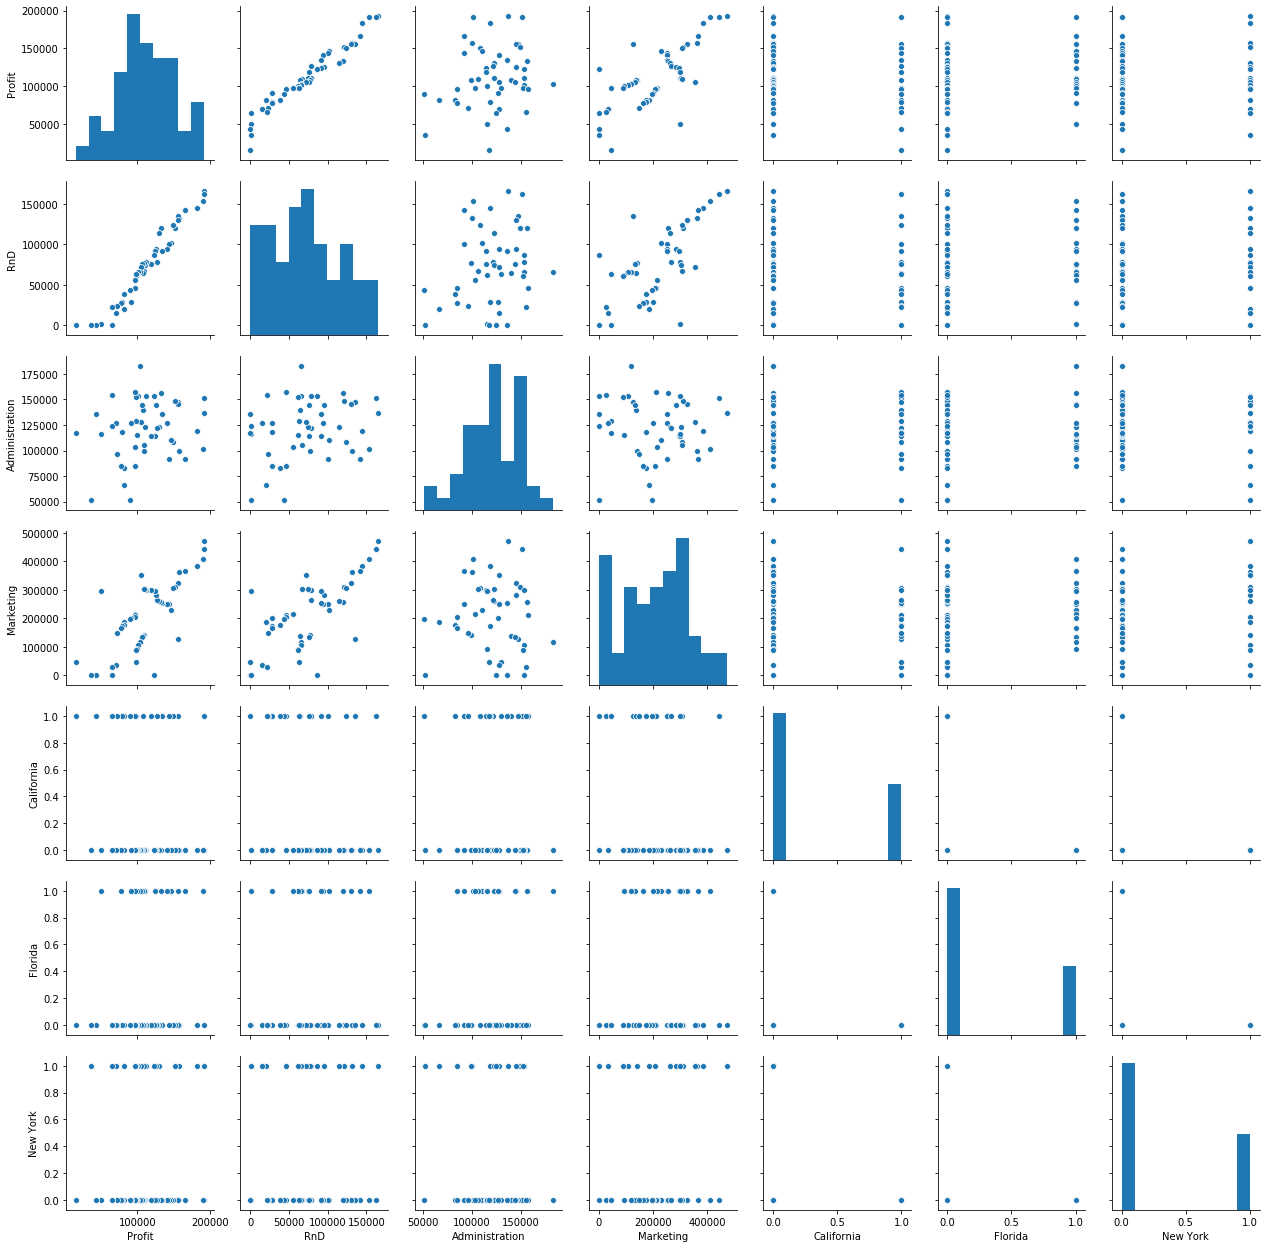

In [43]:
import seaborn as sn

sn.pairplot(startup)
cor_values= startup.corr()

In [44]:
from sklearn.model_selection import train_test_split

train_data,test_data= train_test_split(startup)

In [45]:
import statsmodels.formula.api as smf
startup.rename(columns={'R&D Spend': 'RnD','Marketing Spend':'Marketing','New York':'NewYork'},inplace=True)
train_data.rename(columns={'R&D Spend': 'RnD','Marketing Spend':'Marketing','New York':'NewYork'},inplace=True)
test_data.rename(columns={'R&D Spend': 'RnD','Marketing Spend':'Marketing','New York':'NewYork'},inplace=True)

In [46]:
train_data.to_csv("train_data.csv",encoding="utf-8")
test_data.to_csv("test_data.csv",encoding="utf-8")

In [48]:
model1= smf.ols("Profit~RnD+Administration+Marketing+California+Florida+NewYork",data=train_data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     150.6
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           8.72e-21
Time:                        16:02:41   Log-Likelihood:                -387.40
No. Observations:                  37   AIC:                             786.8
Df Residuals:                      31   BIC:                             796.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.658e+04   5461.678      6.697      0.000    2.54e+04    4.77e+04
RnD                0.8614      0.054     15.889      0.000       0.751       0.972
Administration    -0.0360      0.056     -0.648      0.522      -0.149       0.077
Marketing          0.0221      0.020      1.127      0.268      -0.018       0.062
California      1.181e+04   2655.080      4.447      0.000    6391.099    1.72e+04
Florida         1.537e+04   3351.410      4.587      0.000    8536.271    2.22e+04
NewYork         9401.0683   2682.283      3.505      0.001    3930.516    1.49e+04
==============================================================================
Omnibus:                       14.148   Durbin-Watson:                   2.229
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.956
Skew:                          -1.083   Prob(JB):                     0.000126
Kurtosis:                       5.638   Cond. No.                     1.56e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.23e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Administration is insignificant
## building alone without any other input variable

In [49]:
model1_ad= smf.ols("Profit~Administration", data= train_data).fit()
model1_ad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.553
Date:                Fri, 16 Oct 2020   Prob (F-statistic):              0.221
Time:                        16:04:37   Log-Likelihood:                -446.36
No. Observations:                  37   AIC:                             896.7
Df Residuals:                      35   BIC:                             899.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.604e+04   2.98e+04      2.552      0.015    1.55e+04    1.37e+05
Administration     0.2984      0.239      1.246      0.221      -0.188       0.784
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.179
Skew:                           0.053   Prob(JB):                        0.914
Kurtosis:                       2.676   Cond. No.                     5.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## alone also Administration is insignificant

In [50]:
model1_ma = smf.ols("Profit~Marketing", data= train_data).fit()
model1_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     50.67
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           2.69e-08
Time:                        16:11:19   Log-Likelihood:                -430.60
No. Observations:                  37   AIC:                             865.2
Df Residuals:                      35   BIC:                             868.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.394e+04   9394.357      5.742      0.000    3.49e+04     7.3e+04
Marketing      0.2671      0.038      7.118      0.000       0.191       0.343
==============================================================================
Omnibus:                        5.258   Durbin-Watson:                   1.681
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.039
Skew:                          -0.545   Prob(JB):                        0.133
Kurtosis:                       4.197   Cond. No.                     5.07e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## alone also Markating  is  significant

In [51]:
model1_com= smf.ols("Profit~Administration+Marketing", data= train_data).fit()
model1_com.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     28.52
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           5.35e-08
Time:                        16:13:04   Log-Likelihood:                -428.94
No. Observations:                  37   AIC:                             863.9
Df Residuals:                      34   BIC:                             868.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.151e+04   2.03e+04      1.059      0.297   -1.98e+04    6.28e+04
Administration     0.2712      0.152      1.787      0.083      -0.037       0.580
Marketing          0.2655      0.036      7.292      0.000       0.192       0.339
==============================================================================
Omnibus:                        7.148   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                6.052
Skew:                          -0.715   Prob(JB):                       0.0485
Kurtosis:                       4.370   Cond. No.                     1.23e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#both variables are significant, the intercept becomes insignificant

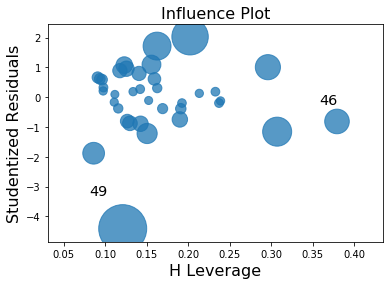

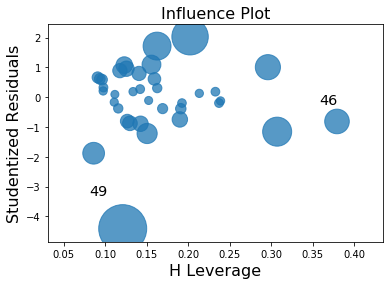

In [52]:
import statsmodels.api as sm

sm.graphics.influence_plot(model1)

In [53]:
train_data1= train_data.drop(train_data.index[[4]], axis=0)

In [55]:
model2= smf.ols("Profit~RnD+Administration+Marketing+California+Florida+NewYork", data= train_data1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     162.8
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           8.54e-21
Time:                        16:16:54   Log-Likelihood:                -375.42
No. Observations:                  36   AIC:                             762.8
Df Residuals:                      30   BIC:                             772.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        3.68e+04   5252.825      7.005      0.000    2.61e+04    4.75e+04
RnD                0.8727      0.052     16.631      0.000       0.766       0.980
Administration    -0.0382      0.053     -0.715      0.480      -0.147       0.071
Marketing          0.0201      0.019      1.065      0.295      -0.018       0.059
California      1.156e+04   2556.187      4.524      0.000    6343.262    1.68e+04
Florida         1.503e+04   3227.483      4.658      0.000    8442.132    2.16e+04
NewYork          1.02e+04   2613.855      3.902      0.000    4861.291    1.55e+04
==============================================================================
Omnibus:                       15.337   Durbin-Watson:                   2.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.154
Skew:                          -1.097   Prob(JB):                     1.55e-05
Kurtosis:                       6.155   Cond. No.                     6.41e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.08e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##0.959, Both Marketing and Administration are insignificant

In [56]:
train_data2 = train_data.drop(train_data.index[[4,24]],axis=0)

In [57]:
model3 = smf.ols("Profit~RnD+Administration+Marketing+California+Florida+NewYork", data= train_data2).fit()
model3.summary()##0.964 and administration is insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     157.0
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           4.47e-20
Time:                        16:19:33   Log-Likelihood:                -365.47
No. Observations:                  35   AIC:                             742.9
Df Residuals:                      29   BIC:                             752.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.684e+04   5350.488      6.886      0.000    2.59e+04    4.78e+04
RnD                0.8725      0.053     16.347      0.000       0.763       0.982
Administration    -0.0396      0.055     -0.717      0.479      -0.153       0.073
Marketing          0.0205      0.019      1.057      0.299      -0.019       0.060
California      1.162e+04   2628.263      4.421      0.000    6243.669     1.7e+04
Florida         1.508e+04   3300.365      4.570      0.000    8333.378    2.18e+04
NewYork         1.014e+04   2690.783      3.768      0.001    4636.608    1.56e+04
==============================================================================
Omnibus:                       14.413   Durbin-Watson:                   2.414
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.520
Skew:                          -1.070   Prob(JB):                     5.77e-05
Kurtosis:                       5.967   Cond. No.                     7.60e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  5e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [60]:
rsq_rnd = smf.ols("RnD~Administration+Marketing+California+Florida+NewYork", data= train_data2).fit().rsquared
ViF_rnd = 1/(1-rsq_rnd)

In [61]:
ViF_rnd 

2.706054035433101

In [62]:
rsq_adm = smf.ols("Administration~RnD+Marketing+California+Florida+NewYork", data=train_data2).fit().rsquared
ViF_adm = 1/(1-rsq_adm)

In [63]:
ViF_adm

1.157183287212038

In [64]:
rsq_mar = smf.ols("Marketing ~ RnD+Administration+California+Florida+NewYork", data= train_data2).fit().rsquared
ViF_mar = 1/(1-rsq_mar)

In [65]:
ViF_mar

2.4826715850678576

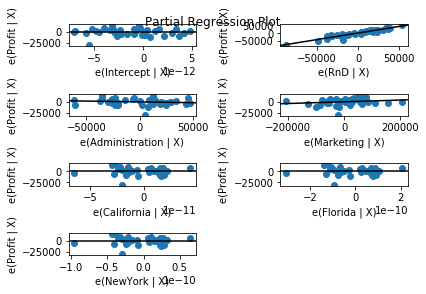

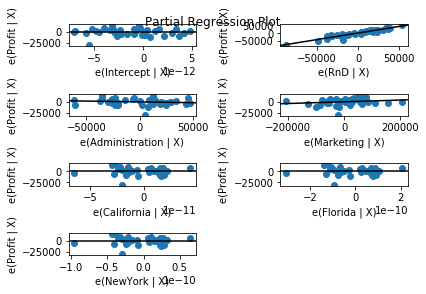

In [66]:
sm.graphics.plot_partregress_grid(model2)

In [67]:
model3= smf.ols("Profit~RnD+Marketing+California+Florida+NewYork",data = train_data2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     199.4
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           3.80e-21
Time:                        16:39:45   Log-Likelihood:                -365.78
No. Observations:                  35   AIC:                             741.6
Df Residuals:                      30   BIC:                             749.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.343e+04   2434.514     13.734      0.000    2.85e+04    3.84e+04
RnD            0.8596      0.050     17.244      0.000       0.758       0.961
Marketing      0.0237      0.019      1.265      0.216      -0.015       0.062
California  1.049e+04   2090.665      5.019      0.000    6223.991    1.48e+04
Florida     1.367e+04   2619.898      5.216      0.000    8314.467     1.9e+04
NewYork     9275.7501   2386.045      3.888      0.001    4402.797    1.41e+04
==============================================================================
Omnibus:                       13.961   Durbin-Watson:                   2.404
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.085
Skew:                          -1.023   Prob(JB):                     7.17e-05
Kurtosis:                       5.984   Cond. No.                     3.41e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.13e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [92]:
train_pred = finalmodel.predict(train_data2)#training data prediction

In [93]:
train_pred

19    116999.063078
44     63665.287139
47     43928.160624
48     43176.173228
35     87143.004488
28    106683.421423
0     196046.600730
20    116566.764023
1     194237.436410
42     67763.288092
8     153727.948186
9     157188.891802
2     188684.245002
29    101649.419905
11    136396.181556
13    129004.287607
3     175911.857933
21    117210.109144
39     81227.651303
12    133717.214212
40     72747.395443
27    113078.550633
38     64497.288933
30    102554.644249
22    117906.396265
37     86488.313134
10    140145.859052
25    102790.248660
49     45000.312670
34     88840.481538
46     55282.091632
7     166794.475597
24    112275.899274
5     164687.644466
36     76513.272568
dtype: float64

In [83]:
train_res= train_data2["Profit"]-train_pred ## training residual

In [84]:
train_res

19     5777.796922
44     1535.042861
47    -1368.430624
48    -7502.763228
35     9336.505512
28    -3401.041423
0     -3784.770730
20     1907.265977
1     -2445.376410
42     3735.201908
8     -1516.178186
9     -7428.931802
2      2366.144998
29     -644.779905
11     7863.218444
13     5303.062393
3      6990.132067
21    -5897.089144
39     -221.891303
12     7868.305788
40     5492.514557
27    -8070.240633
38    16731.771067
30    -2617.054249
22    -7554.146265
37     3460.826866
10     5976.090948
25     4614.091340
49   -30318.912670
34     7872.318462
46    -5791.341632
7    -11041.875597
24    -3723.859274
5     -7696.524466
36    14194.917432
dtype: float64

In [85]:
train_rmse = np.sqrt(np.mean(train_res*train_res)) ### train rmse

In [96]:
train_rmse

8364.895840921557

In [87]:
test_pred = finalmodel.predict(test_data) ## test data prediction

In [88]:
test_pred

17    130786.930095
26    115035.917579
6     162678.741545
23    112385.852217
45     43615.226383
33     99897.876062
32     99530.036722
18    132969.398443
16    117264.541491
41     74980.628411
14    156294.281991
43     56882.761037
4     177949.776918
dtype: float64

In [ ]:
test_res= test_data["Profit"]- test_pred ##test residuals

In [89]:
test_res

17    -5416.560095
26    -9302.377579
6     -6556.231545
23    -3651.862217
45    21310.853617
33    -3118.956062
32    -2102.196722
18    -8702.498443
16     9728.388509
41     2818.201589
14   -23691.631991
43    12876.218963
4    -11761.836918
dtype: float64

In [90]:
test_rmse = np.sqrt(np.mean(test_res*test_res)) ##test rmse

In [91]:
test_rmse

11382.31338070683

## as the data is very less to properly train the model,there is difference in test rmse and train rmse

## training the model with the whole data set

In [74]:
startup1= startup.drop(startup.index[[4,24]],axis=0)
bestmodel= smf.ols("Profit~RnD+Marketing+California+Florida+NewYork",data =startup1).fit()
bestmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     200.4
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           3.35e-27
Time:                        16:43:20   Log-Likelihood:                -505.22
No. Observations:                  48   AIC:                             1020.
Df Residuals:                      43   BIC:                             1030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.525e+04   2158.528     16.332      0.000    3.09e+04    3.96e+04
RnD            0.8017      0.044     18.327      0.000       0.713       0.890
Marketing      0.0290      0.017      1.750      0.087      -0.004       0.062
California  1.153e+04   1959.390      5.886      0.000    7581.153    1.55e+04
Florida     1.199e+04   2231.189      5.376      0.000    7495.179    1.65e+04
NewYork     1.172e+04   2091.061      5.607      0.000    7507.870    1.59e+04
==============================================================================
Omnibus:                       14.156   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.900
Skew:                          -0.965   Prob(JB):                     7.87e-05
Kurtosis:                       5.392   Cond. No.                     1.20e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.15e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [75]:
bestmodel_pred = bestmodel.predict(startup1)

Text(0, 0.5, 'Fitted values')

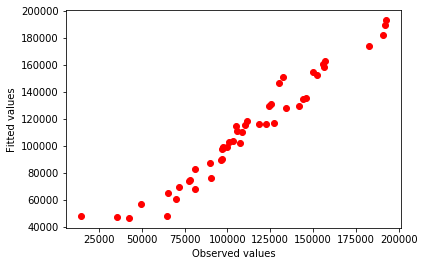

In [95]:
plt.scatter(startup1.Profit,bestmodel_pred,c='r');plt.xlabel("Observed values");plt.ylabel("Fitted values") ###  Observed values v/s Fitted values

Text(0, 0.5, 'Residuals')

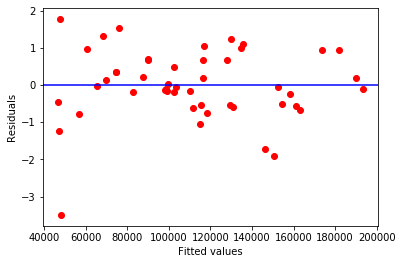

In [94]:
plt.scatter(bestmodel_pred,bestmodel.resid_pearson, c='r');plt.axhline(y=0,color='blue');plt.xlabel("Fitted values");plt.ylabel("Residuals") ##Residuals v/s Fitted values

(array([ 1.,  0.,  0.,  2.,  2., 10., 15.,  8.,  7.,  3.]),
 array([-3.50866306, -2.97830915, -2.44795525, -1.91760135, -1.38724745,
        -0.85689354, -0.32653964,  0.20381426,  0.73416816,  1.26452207,
         1.79487597]),
 <a list of 10 Patch objects>)

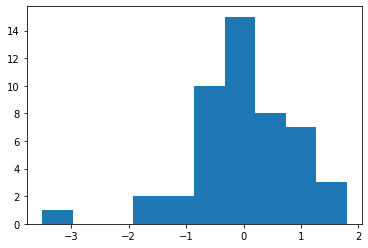

In [77]:
plt.hist(bestmodel.resid_pearson) ##histogram

In [78]:
import pylab
import scipy.stats as st

((array([-2.18794508, -1.81466696, -1.5940389 , -1.43152593, -1.29991017,
         -1.18761792, -1.08858668, -0.99921942, -0.91719469, -0.84091983,
         -0.76924975, -0.7013297 , -0.63650166, -0.57424545, -0.51414026,
         -0.45583845, -0.39904728, -0.34351563, -0.28902427, -0.23537844,
         -0.18240202, -0.12993297, -0.07781945, -0.02591656,  0.02591656,
          0.07781945,  0.12993297,  0.18240202,  0.23537844,  0.28902427,
          0.34351563,  0.39904728,  0.45583845,  0.51414026,  0.57424545,
          0.63650166,  0.7013297 ,  0.76924975,  0.84091983,  0.91719469,
          0.99921942,  1.08858668,  1.18761792,  1.29991017,  1.43152593,
          1.5940389 ,  1.81466696,  2.18794508]),
  array([-3.50866306, -1.91417586, -1.72759685, -1.23268811, -1.05039156,
         -0.77854107, -0.75465648, -0.65273938, -0.6074688 , -0.59579298,
         -0.55969506, -0.53273591, -0.52478929, -0.49680024, -0.44370809,
         -0.23933784, -0.18459717, -0.17530937, -0.16016657, -

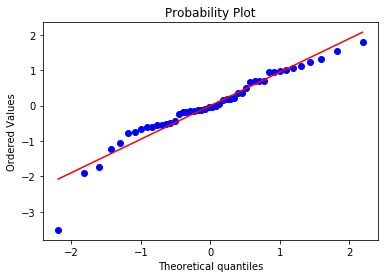

In [80]:
st.probplot(bestmodel.resid_pearson, dist='norm', plot=pylab) ##QQplot

Text(0, 0.5, 'Residuals')

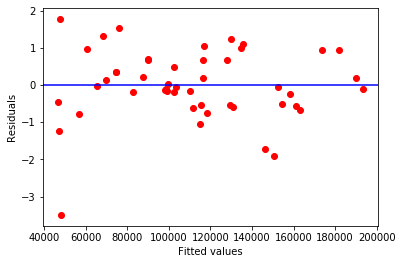

In [81]:
plt.scatter(bestmodel_pred,bestmodel.resid_pearson,c='r');plt.axhline(y=0,color='blue');plt.xlabel("Fitted values");plt.ylabel("Residuals") ###Homoscadasticity